# Decoding Financial Trends: Advanced Analytics and Machine Learning on Fortune 1000 Data

# Importing Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load Dataset

In [4]:
file_path = 'fortune1000_2024.csv'
df = pd.read_csv(file_path)

# Data Overview

In [6]:
print("### Dataset Overview ###")
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")
print("\nFirst few rows of the dataset:")
print(df.head())

### Dataset Overview ###
Total Rows: 1000
Total Columns: 32

First few rows of the dataset:
   Rank             Company Ticker       Sector  \
0     1             Walmart    WMT    Retailing   
1     2              Amazon   AMZN    Retailing   
2     3               Apple   AAPL   Technology   
3     4  UnitedHealth Group    UNH  Health Care   
4     5  Berkshire Hathaway   BRKA   Financials   

                                   Industry Profitable Founder_is_CEO  \
0                     General Merchandisers        yes             no   
1           Internet Services and Retailing        yes             no   
2               Computers, Office Equipment        yes             no   
3   Health Care: Insurance and Managed Care        yes             no   
4  Insurance: Property and Casualty (Stock)        yes             no   

  FemaleCEO Growth_in_Jobs  Change_in_Rank  ...   Assets_M  \
0        no             no             0.0  ...   252399.0   
1        no             no            

# Check for Missing Values


In [8]:
print("\n### Missing Values ###")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


### Missing Values ###
Ticker                         41
Newcomer_to_the_Fortune500    500
MarketCap_March28_M            41
RevenuePercentChange            6
Profits_M                       2
ProfitsPercentChange          150
MarketCap_Updated_M            37
dtype: int64


# Handle Missing Values

In [10]:
df['Ticker'].fillna('Unknown', inplace=True)
df['MarketCap_March28_M'].fillna(df['MarketCap_March28_M'].median(), inplace=True)
df['RevenuePercentChange'].fillna(df['RevenuePercentChange'].median(), inplace=True)
df['Profits_M'].fillna(df['Profits_M'].median(), inplace=True)
df['ProfitsPercentChange'].fillna(df['ProfitsPercentChange'].median(), inplace=True)
df['MarketCap_Updated_M'].fillna(df['MarketCap_Updated_M'].median(), inplace=True)

# Drop Columns with too many missing values or irrelevant to analysis

In [12]:
df.drop(['Newcomer_to_the_Fortune500', 'Footnote'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)


In [14]:
print("\n### Exploratory Data Analysis (EDA) ###")

# Descriptive Statistics
print("\nDescriptive statistics:")
print(df.describe())



### Exploratory Data Analysis (EDA) ###

Descriptive statistics:
              Rank  Change_in_Rank  Number_of_employees  MarketCap_March28_M  \
count  1000.000000      1000.00000         1.000000e+03         1.000000e+03   
mean    500.498000         5.83800         3.661176e+04         4.926833e+04   
std     288.819686        66.88084         9.990100e+04         1.875438e+05   
min       1.000000      -577.00000         2.800000e+01         1.200000e+00   
25%     250.750000       -14.00000         6.718000e+03         5.062375e+03   
50%     500.500000         4.00000         1.400000e+04         1.253230e+04   
75%     750.250000        30.25000         3.074075e+04         3.584453e+04   
max    1000.000000       420.00000         2.100000e+06         3.126133e+06   

          Revenues_M  RevenuePercentChange     Profits_M  \
count    1000.000000           1000.000000   1000.000000   
mean    20965.064200              6.774400   1864.516700   
std     48589.311028             

# Distribution of Revenues

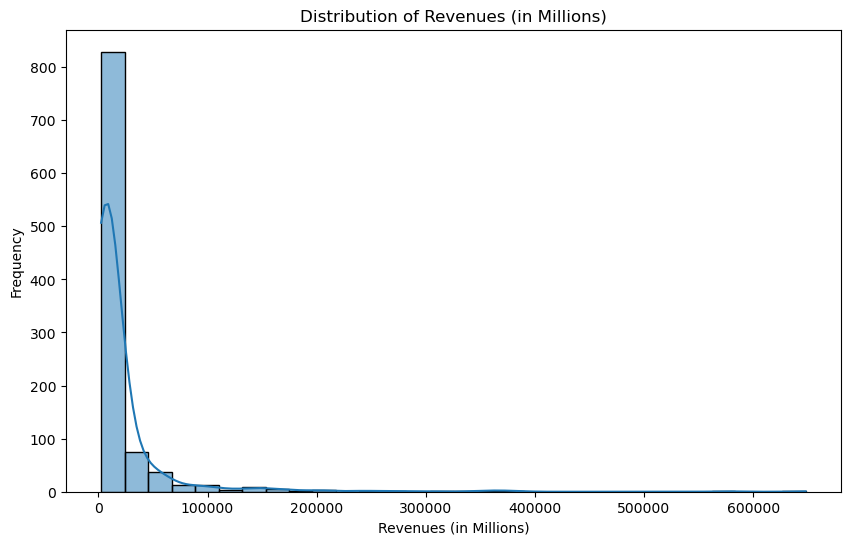

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenues_M'], bins=30, kde=True)
plt.title("Distribution of Revenues (in Millions)")
plt.xlabel("Revenues (in Millions)")
plt.ylabel("Frequency")
plt.show()


# Sector Distribution


In [18]:
# Check unique values in the 'Sector' column
print(df['Sector'].unique())

# Replace 'no' and other invalid values with NaN
df['Sector'] = df['Sector'].replace(['no', 'N/A', '', None], np.nan)

# Drop rows with NaN values in the 'Sector' column
df.dropna(subset=['Sector'], inplace=True)


['Retailing' 'Technology' 'Health Care' 'Financials' 'Energy'
 'Motor Vehicles & Parts' 'Food & Drug Stores' 'Telecommunications'
 'Food, Beverages & Tobacco' 'Transportation' 'Media' 'Household Products'
 'Aerospace & Defense' 'Wholesalers' 'Industrials' 'Apparel' 'Chemicals'
 'Hotels, Restaurants & Leisure' 'Engineering & Construction' 'Materials'
 'Business Services']


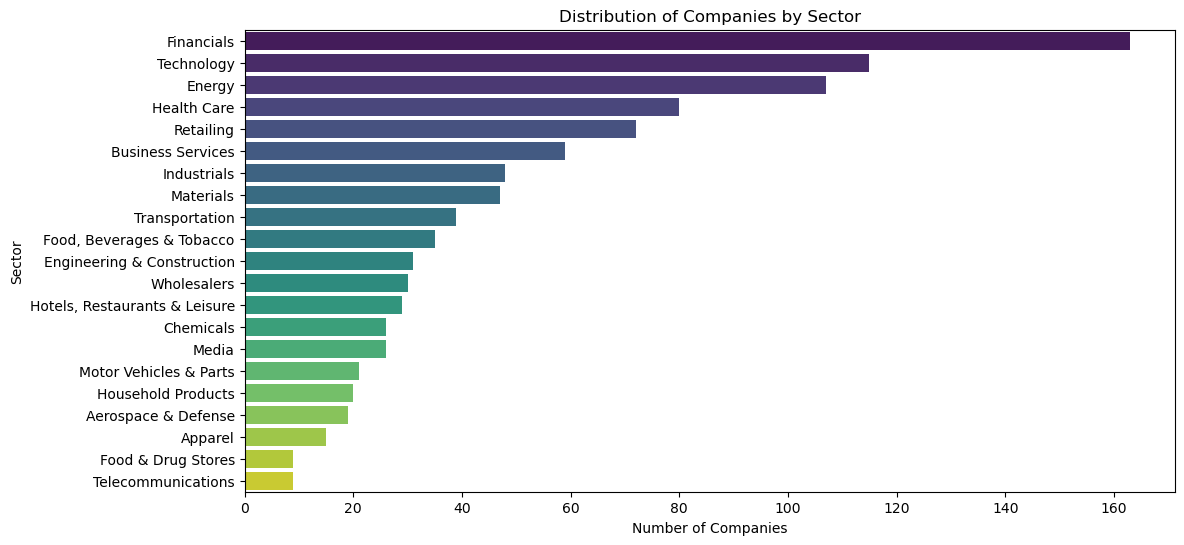

In [19]:
# Plot the cleaned data
plt.figure(figsize=(12, 6))
sector_counts = df['Sector'].value_counts()
sns.barplot(x=sector_counts.values, y=sector_counts.index, palette='viridis')
plt.title("Distribution of Companies by Sector")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.show()


# Profitability by Sector

In [21]:
# Convert 'Profitable' column to numeric values
df['Profitable'] = df['Profitable'].map({'yes': 1, 'no': 0})

# Check if conversion is successful
print(df['Profitable'].unique())


[1 0]


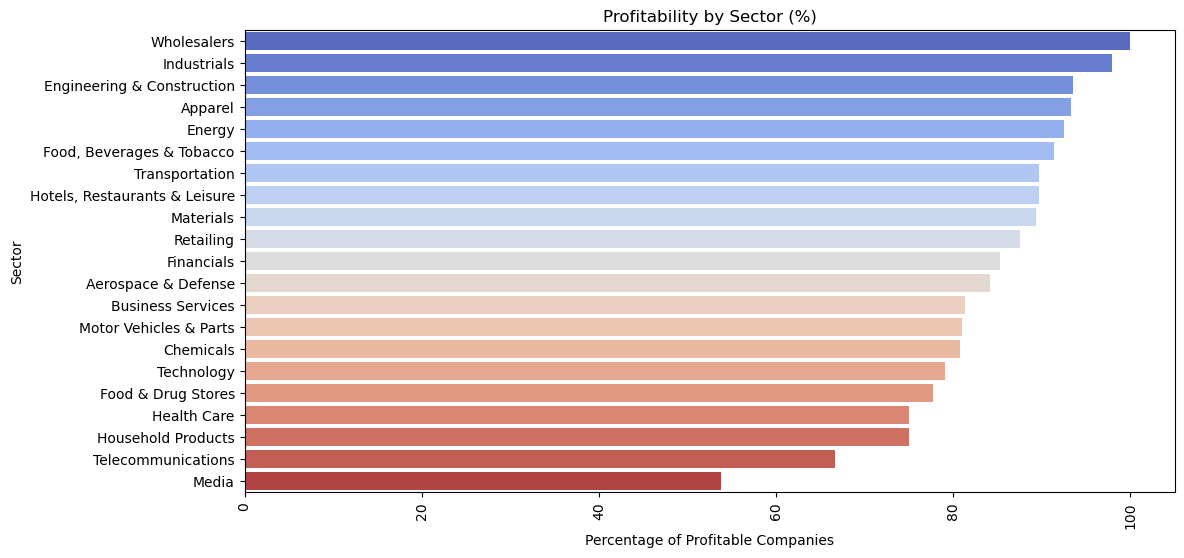

In [22]:
# Plot the cleaned data
plt.figure(figsize=(12, 6))
profitability_by_sector = df.groupby('Sector')['Profitable'].mean().sort_values(ascending=False) * 100
sns.barplot(x=np.round(profitability_by_sector.values, 2), y=profitability_by_sector.index, palette='coolwarm')
plt.title("Profitability by Sector (%)")
plt.xlabel("Percentage of Profitable Companies")
plt.ylabel("Sector")
plt.xticks(rotation=90)
plt.show()


# Top 10 Companies by Number of Employees


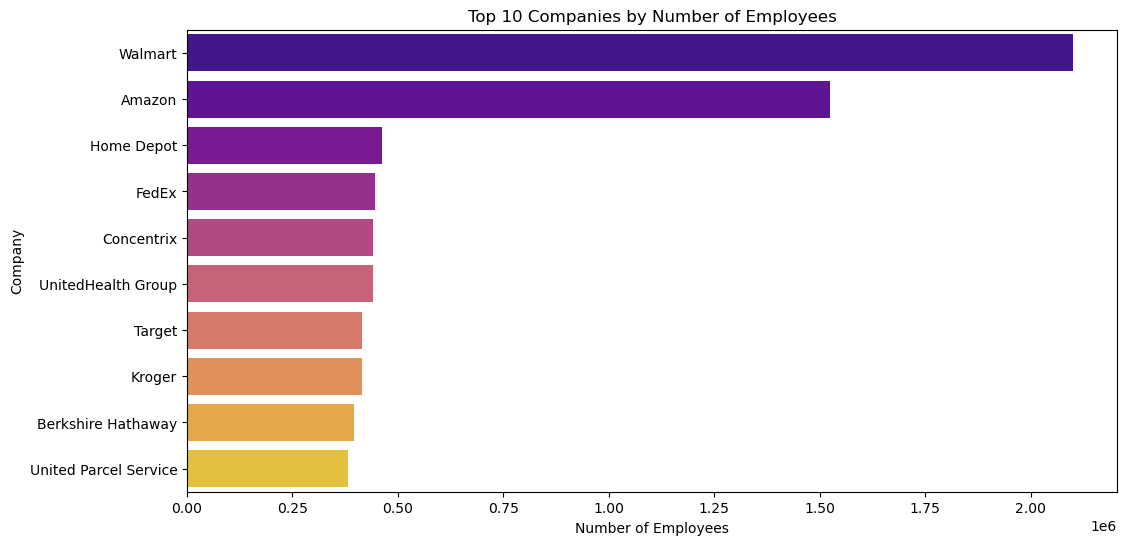

In [24]:
plt.figure(figsize=(12, 6))
top_employers = df[['Company', 'Number_of_employees']].sort_values(by='Number_of_employees', ascending=False).head(10)
sns.barplot(x=top_employers['Number_of_employees'], y=top_employers['Company'], palette='plasma')
plt.title("Top 10 Companies by Number of Employees")
plt.xlabel("Number of Employees")
plt.ylabel("Company")
plt.show()


# Revenue vs. Profits


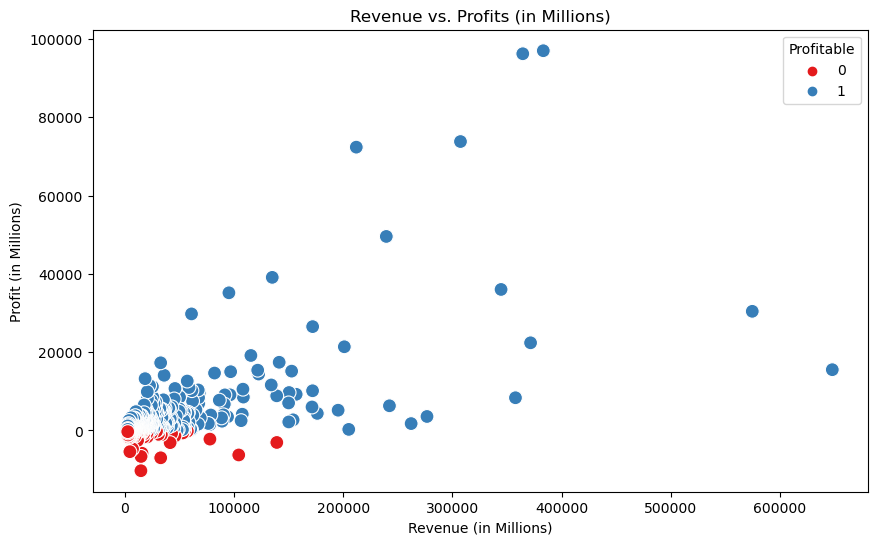

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Revenues_M', y='Profits_M', hue='Profitable', data=df, palette='Set1', s=100)
plt.title("Revenue vs. Profits (in Millions)")
plt.xlabel("Revenue (in Millions)")
plt.ylabel("Profit (in Millions)")
plt.legend(title="Profitable")
plt.show()


# Revenue Growth vs. Profit Growth


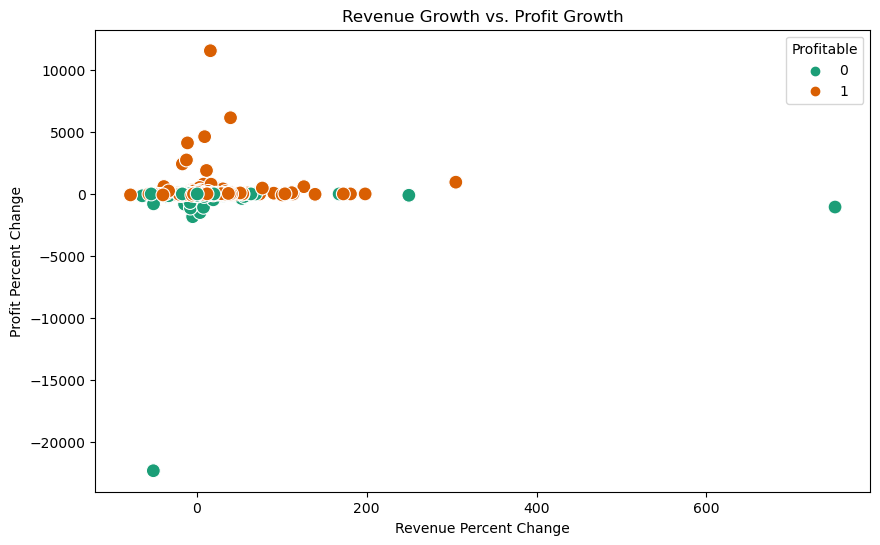

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RevenuePercentChange', y='ProfitsPercentChange', hue='Profitable', data=df, palette='Dark2', s=100)
plt.title("Revenue Growth vs. Profit Growth")
plt.xlabel("Revenue Percent Change")
plt.ylabel("Profit Percent Change")
plt.legend(title="Profitable")
plt.show()


# Change in Rank vs. Market Cap

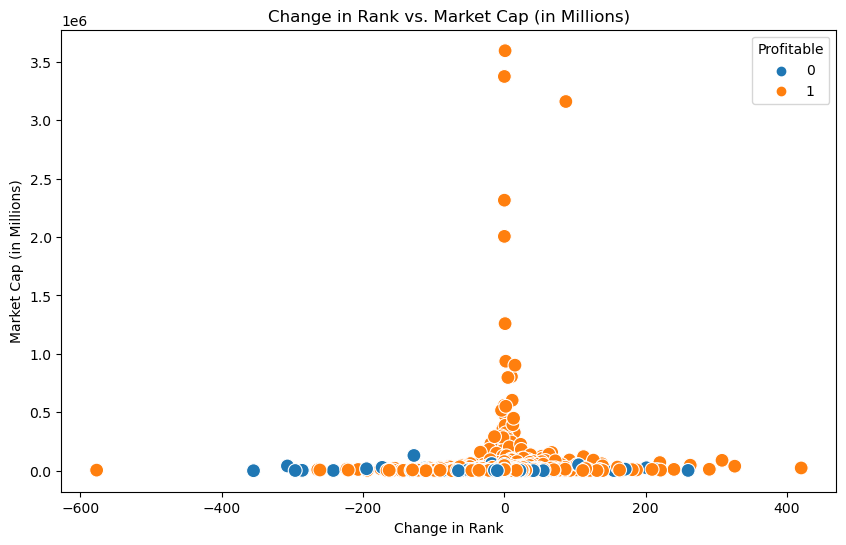

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Change_in_Rank', y='MarketCap_Updated_M', hue='Profitable', data=df, palette='tab10', s=100)
plt.title("Change in Rank vs. Market Cap (in Millions)")
plt.xlabel("Change in Rank")
plt.ylabel("Market Cap (in Millions)")
plt.legend(title="Profitable")
plt.show()


# Revenue Growth Over Time (for Top 5 Companies by Revenue)


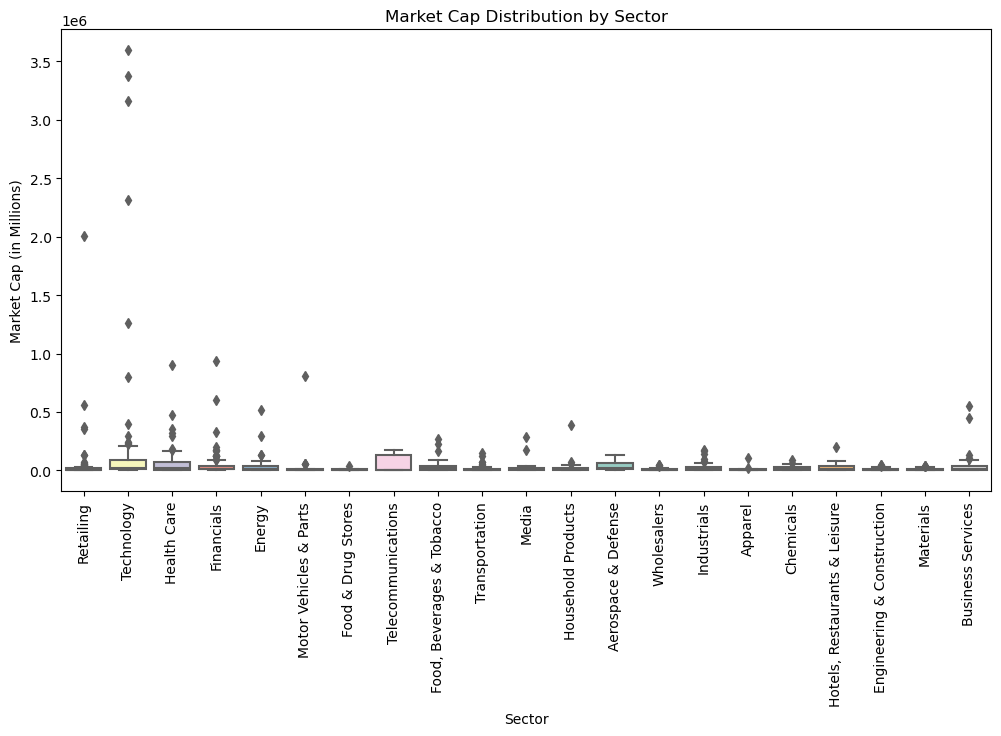

In [32]:
# Market Cap Distribution by Sector
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='MarketCap_Updated_M', data=df, palette='Set3')
plt.title("Market Cap Distribution by Sector")
plt.xlabel("Sector")
plt.ylabel("Market Cap (in Millions)")
plt.xticks(rotation=90)
plt.show()


# Average Revenue by Sector


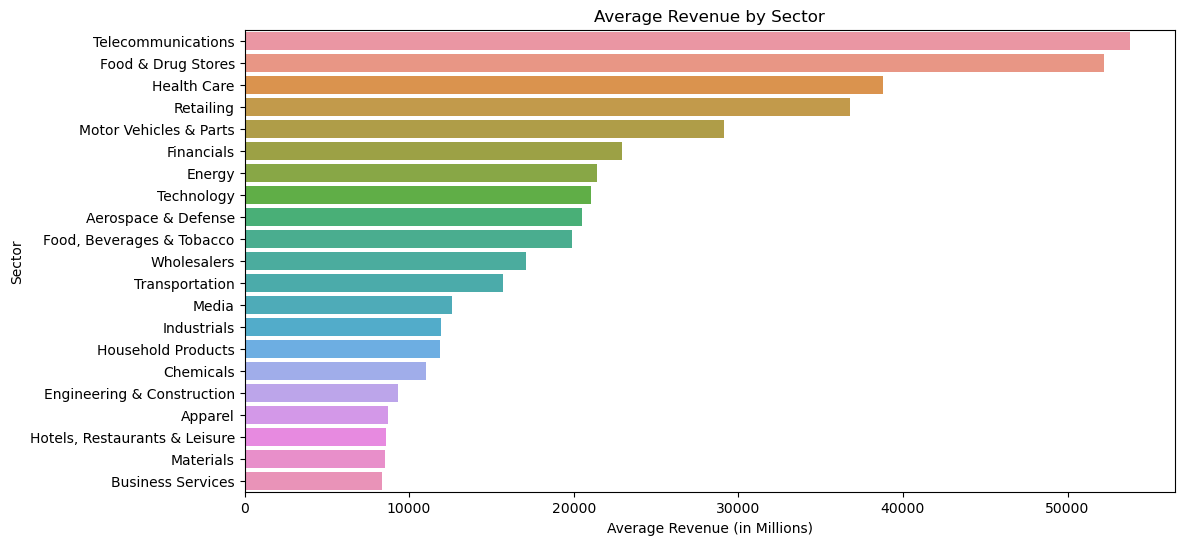

In [34]:
plt.figure(figsize=(12, 6))
avg_revenue_by_sector = df.groupby('Sector')['Revenues_M'].mean().sort_values(ascending=False)
sns.barplot(x=avg_revenue_by_sector.values, y=avg_revenue_by_sector.index)
plt.title("Average Revenue by Sector")
plt.xlabel("Average Revenue (in Millions)")
plt.ylabel("Sector")
plt.show()

# Correlation Heatmap


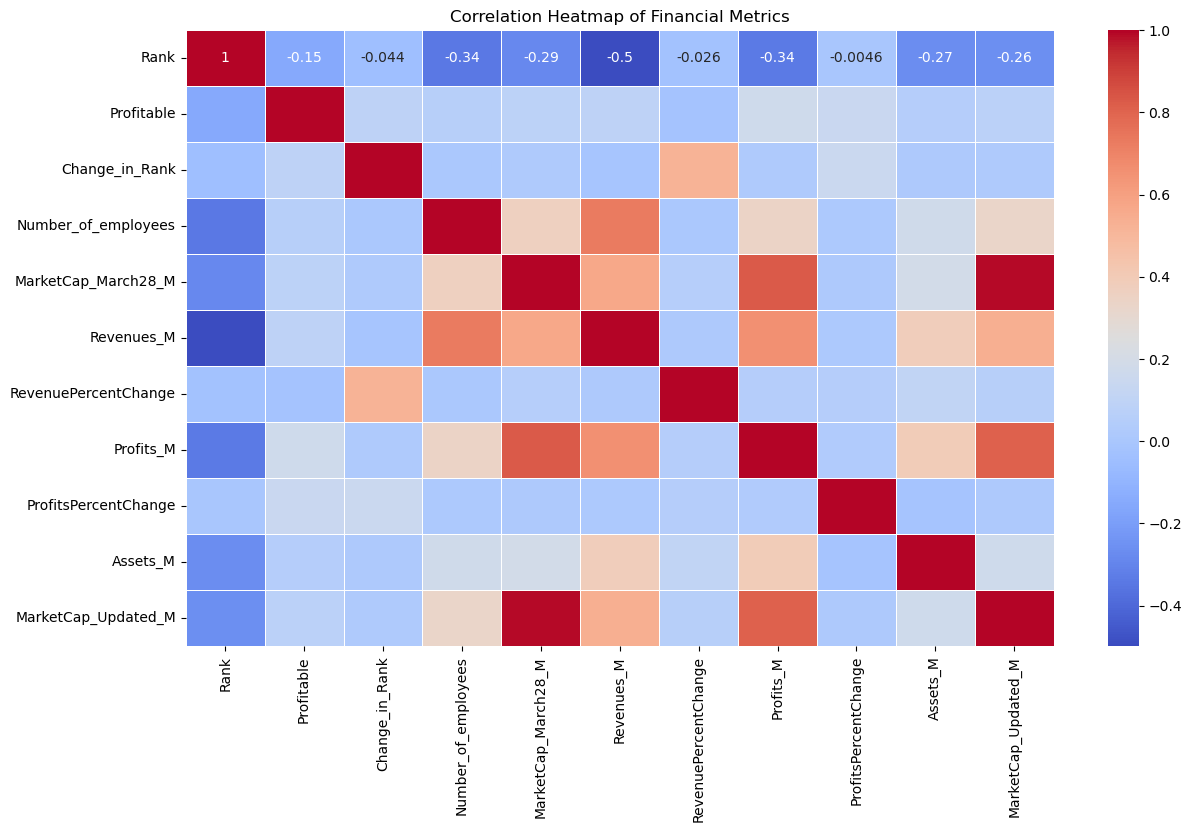

In [36]:
plt.figure(figsize=(14, 8))
# Select only numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Financial Metrics")
plt.show()

# Insight: Top 10 Companies by Revenue

In [38]:
top_companies = df[['Company', 'Revenues_M']].sort_values(by='Revenues_M', ascending=False).head(10)
print("\n### Insight: Top 10 Companies by Revenue ###")
print(top_companies)



### Insight: Top 10 Companies by Revenue ###
              Company  Revenues_M
0             Walmart    648125.0
1              Amazon    574785.0
2               Apple    383285.0
3  UnitedHealth Group    371622.0
4  Berkshire Hathaway    364482.0
5          CVS Health    357776.0
6         Exxon Mobil    344582.0
7            Alphabet    307394.0
8            McKesson    276711.0
9             Cencora    262173.4


# Encoding Categorical Variables


In [40]:
label_encoder = LabelEncoder()

# Encode all categorical columns
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col] = label_encoder.fit_transform(df[col])


# Ensure all columns are numeric

In [42]:
df_ml = df.drop(['Rank', 'Company', 'Ticker', 'CEO', 'HeadquartersCity', 'Website'], axis=1)
non_numeric_cols = df_ml.select_dtypes(exclude=['float64', 'int64', 'uint8']).columns

if len(non_numeric_cols) > 0:
    print(f"Non-numeric columns found: {non_numeric_cols}")
else:
    print("All columns are numeric.")


Non-numeric columns found: Index(['Sector', 'Industry', 'Founder_is_CEO', 'FemaleCEO', 'Growth_in_Jobs',
       'Gained_in_Rank', 'Dropped_in_Rank', 'Global500',
       'Worlds_Most_Admired_Companies', 'Best_Companies_to_Work_For',
       'Country', 'HeadquartersState', 'CompanyType', 'Updated'],
      dtype='object')


# Feature Scaling

In [44]:
scaler = StandardScaler()
X = scaler.fit_transform(df_ml.drop('Profitable', axis=1))
y = df_ml['Profitable']


# Train-Test Split


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Model: Random Forest Classifier
print("\n### Machine Learning Model: Random Forest Classifier ###")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)



### Machine Learning Model: Random Forest Classifier ###


# Model Evaluation

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Random Forest Model Accuracy: 99.50%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.99      1.00      1.00       178

    accuracy                           0.99       200
   macro avg       1.00      0.98      0.99       200
weighted avg       1.00      0.99      0.99       200



# Feature Importance


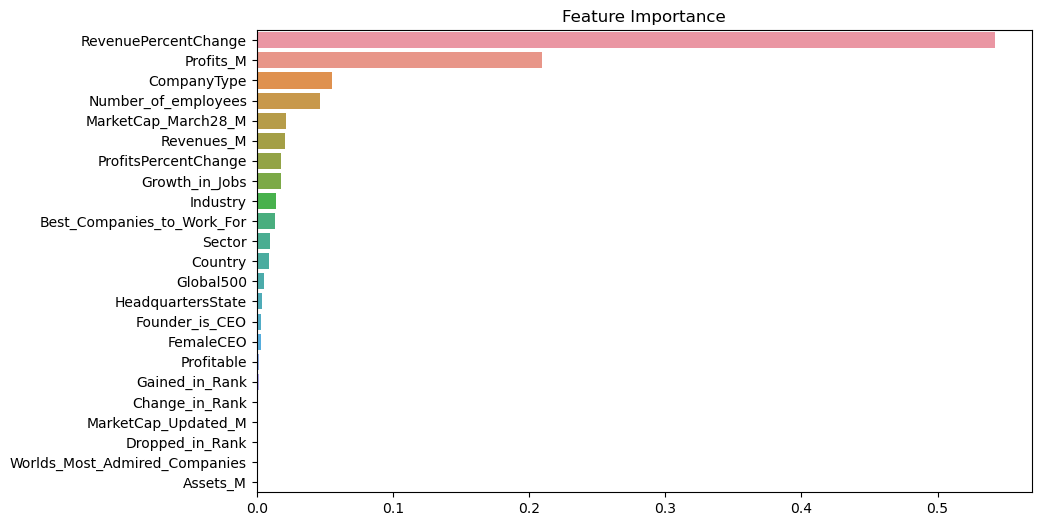

In [50]:

feature_importance = pd.Series(rf_model.feature_importances_, index=df_ml.columns[:-1]).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.show()
